# Chapter 2 - Small Worlds vs Large Wolrds

The **Small World** represents the scientific model itself, and the **Large World**
represents the broader context in which one deploys a model.

**Bayesian inference** is just counting and comparing of possibilities. Consider
by analogy Jorge Luis Borges’ short story “The Garden of Forking Paths.”
In order to make good inference about what actually happened, it helps to consider
 everything that could have happened. A Bayesian analysis is a garden of forking data,
 in which alternative sequences of events are cultivated.

**The approach cannot guarantee a correct answer**, on large world terms. But it can
guarantee the best possible answer, on small world terms, that could be derived
from the information fed into it.

The goal of the Bayesian approach is to figure out which of the conjectures for a
certain context is **the most plausible**, given some evidence (data).

By comparing these counts, we have part of a solution
for a way to rate the relative plausibility of each conjecture.
But it’s only a part of a solution, because in order to compare these counts
we first have to decide how many ways each conjecture could itself be realized.
We might argue that when we have no reason to assume otherwise, we can just consider
 each conjecture equally plausible and compare the counts directly, **Principle of Indifference**.
 But often we do have reason to assume otherwise.

> ***Principle of indifference***: When there is no reason to say that one conjecture is more plausible
> than another, weigh all of the conjectures equally.

To grasp a solution, suppose we’re willing to say each conjecture is equally plausible
at the start. Then, we just compare the counts of ways
in which each conjecture is compatible with the observed data. So, comparing them can suggest
that ones are more plausible, than others. Since these are our initial counts, and
probably they are going to update later, they are labeled **prior**.

Then when we get more evidence or observations, we can update the conjectures' plausibility.
Only if they new data is independent of the previous data,
> To update the plausibility ***p*** of  a conjecture ***C*** that is produced in ***W<sub>prior</sub>***
> ways based on previous data ***D<sub>prior</sub>*** after providing more evidence ***D<sub>new</sub>***
> is as follows:
>
> $\Large P_c \propto W_{prior} \times W_{new} $

Why multiplication? Because it's a shortcut for counting all possible paths.



## From counting to probability

It’s hard to use these counts though, so almost always they are standardized in a way that
transforms them into probabilities.

The meaning would be the same, it’s just the relative values that matter. Second,
as the amount of data grows, the counts will very quickly grow very large and become difficult
to manipulate.

Then, for any value p can take, we judge the plausibility of that value p
as proportional to the number of ways it can get through the garden of forking data.
Finally, we construct probabilities by standardizing the plausibility so that the sum of
the plausibilities for all possible conjectures will be one. All you need to do in order to
standardize is to add up all of the products, one for each value p can take, and then divide each
product by the sum of products:

Being ***p*** the proportion of a feature,

\begin{align*}
\Large P_p={\frac {W_{{p}_{new}} \times P_{prior}}{\sum \small products}}
\end{align*}

## Example 2.1
There is a bag with four marbles, and we only know that they are <span style="color:blue">blue [B]</span> and
<span style="color:grey">white [W]</span>. A marble is picked from the bag putting it back after finishing, after
doing this four times we got the sequence [<span style="color:blue">B</span> <span style="color:grey">W</span> <span style="color:blue">B</span>] .

So if ***p*** is defined as the proportion of marbles that are blue, for [<span style="color:blue">B </span><span style="color:grey">W W W</span>]
with ***D<sub>new</sub>*** = [<span style="color:blue">B</span> <span style="color:grey">W</span> <span style="color:blue">B</span>],
we can say that:

> plausability of ***p*** after ***D<sub>new</sub>*** $\propto$ was ***p*** can produce
> ***D<sub>new</sub>*** $\times$ prior plausability of ***p***

The above just means that for any value p can take, we judge the plausibility of that value p
as proportional to the number of ways it can get through the garden of forking data.

| Composition | p (prop.) | Ways (W) | Plausability (P) |
| --- | --- | --- | --- |
| [ <span style="color:grey">W W W W</span> ] | 0 | 0 | 0 |
| [ <span style="color:blue">B </span><span style="color:grey">W W W</span> ] | 0.25 | 3 | 0.15 |
| [ <span style="color:blue">B B</span><span style="color:grey"> W W</span> ] | 0.5 | 8 | 0.4 |
| [ <span style="color:blue">B B B </span><span style="color:grey">W</span> ] | 0.75 | 9 | 0.45 |
| [ <span style="color:blue">B B B B</span> ] | 1 | 0 | 0 |

* A conjectured proportion of blue marbles, p, is usually called a ***parameter*** value.
It’s just a way of indexing possible explanations of the data.
* The relative number of ways that a value p can produce the data is usually called
a ***likelihood***. It is derived by enumerating all the possible data sequences that
could have happened and then eliminating those sequences inconsistent with the
data.
* The prior plausibility of any specific p is usually called the ***prior probability***.
* The new, updated plausibility of any specific p is usually called the ***posterior
probability***.
## Libraries import

In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

*2.1.1- How to calculate this plausibilities of the example 2.1 in Python?*

In [2]:
Ways=np.array([0,3,8,9,0])
# Prior plausibility of p is 1 (it didn't change). So,
Ways/Ways.sum()

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

## 2.1 Building a model
By working with probabilities instead of raw counts, Bayesian inference is made much
easier, but it looks much harder.

To get the logic moving, we need to make assumptions, and these assumptions constitute
the model. Designing a simple Bayesian model benefits from a design loop with three steps.
1. Data story: Motivate the model by narrating how the data might arise.
2. Update: Educate your model by feeding it the data.
3. Evaluate: All statistical models require supervision, leading possibly to model revision.

### 2.1.1. A data story

Bayesian data analysis usually means producing a story for how the data came to be. This story may be descriptive, specifying associations that can be used to
predict outcomes, given observations. Or it may be causal, a theory of how some events produce other events.

Typically, any story you intend to be causal may also be descriptive. But many descriptive stories are hard to interpret causally. But all data stories are complete,
in the sense that they are sufficient for specifying an algorithm for simulating new data.

### 2.1.2 Bayesian updating

Using the evidence to decide among different possible conjectures, like the marbles on the bag previously. Each possible proportion may be more or less plausible, given the evidence.
A Bayesian model begins with one set of plausibilities assigned to each of these possibilities.
These are the prior plausibilities. Then it updates them in light of the data, to produce the
posterior plausibilities. This updating process is a kind of learning, called ***Bayesian Updating***.

Notice that every updated set of plausibilities becomes the initial plausibilities for the
next observation. Every conclusion is the starting point for future inference. However, this
updating process works backwards, as well as forwards.

Given the final set of plausibilities, it is possible
to mathematically divide out the observation, to infer the previous plausibility curve. So the
data could be presented to your model in any order, or all at once even. In most cases, you
will present the data all at once, for the sake of convenience. But it’s important to realize that
this merely represents abbreviation of an ***Iterated Learning Process***.

### 2.1.3 Evaluate
The Bayesian model learns in a way that is demonstrably optimal, provided
that the real, large world is accurately described by the model. This is to say that your
Bayesian machine guarantees perfect inference, within the small world. No other way of
using the available information, and beginning with the same state of information, could do
better.

However, the calculations may malfunction, so results always have to be checked. And if
there are important differences between the model and reality, then there is no logical
guarantee of large world performance. And even if the two worlds did match, any particular
sample of data could still be misleading. So it’s worth keeping in mind at least two cautious principles:

1. *First, the model’s certainty is no guarantee that the model is a good one.*
2. *Supervise and critique your model’s work.*

Moreover, models do not need to be exactly true in order to produce highly precise and useful inferences.
This is because models are essentially information processing machines, and there are some surprising aspects of
information that cannot be easily captured by framing the problem in terms of the truth of
assumptions.

Instead, the objective is to check the model’s adequacy for some purpose. This usually
means asking and answering additional questions, beyond those that originally constructed
the model. Both the questions and answers will depend upon the scientific context.

## 2.2 Components of the model
Consider three different kinds of things we counted in the previous sections.
1. The number of ways each conjecture could produce an observation
2. The accumulated number of ways each conjecture could produce the entire data
3. The initial plausibility of each conjectured cause of the data

Each of these things has a direct analog in conventional probability theory. And so the usual way we build a statistical model involves
choosing distributions and devices for each that represent the relative numbers of ways things can happen.


1. Variables. Variables are just symbols that can take on different values. In a scientific context, 
variables include things we wish to infer, such as proportions and rates, as well as things we might observe, the data. The first variable is our target of inference, *p*, *e.g. the proportion of marbles in the bag*. This variable cannot be observed. Unobserved variables are usually called ***PARAMETERS***. But while *p* itself is unobserved, we can infer it from the other variables.

> *When we observe a sample of variables, we need to say how likely that exact sample is, out of the universe of potential samples of the same length.*

2. Definitions. Once we have all the variables we need to define each, we build a model that relates the variables to one to another. The
goal is count all the ways the data could arise, given the assumptions. 
    1. ***Observed variables***. Define how plausible any combination of this variables is. Each specific value of ***p*** corresponds to aspecific plausibility of the data. In conventional statistics, a distribution function assigned to an observed variable is usually landcalled a likelihood. That term has special meaning in non-Bayesian statistics, however.
    2. ***Unobserved variables***. The distributions we assign to the observed variables typically have their own variables. In the binomial below, there is $p$, the probability of sampling water. Since p is not observed, we usually call it a ***PARAMETER***. or every parameter you intend your Bayesian machine to consider, you must provide a
distribution of prior plausibility, its ***PRIOR***.




### 2.2.1 Prior
        
When you have a previous estimate to provide, that can become the prior. As a result, each estimate becomes the prior for the next step.
But this doesn’t resolve the problem of providing a prior, because at the dawn of time, when $N = 0$, the machine still had an initial state of information for the parameter $p$: *a flat line specifying equal plausibility for every possible value*.

*So where do priors come from?* They are both engineering assumptions, chosen to help the machine learn, and scientific assumptions, chosen to reflect what we know about a phenomenon. The flat prior is very common, but it is hardly ever the best prior.

There is a school of Bayesian inference that emphasizes choosing priors based upon the personal beliefs of the analyst. While this subjective Bayesian approach thrives in some statistics and philosophy and economics programs, it is rare in the sciences. Within Bayesian data analysis in the natural and social sciences, the prior is considered to be just part of the model. As such it should be chosen, evaluated, and revised just like all of the other components of the model. In practice, the subjectivist and the non-subjectivist will often analyze data in nearly the same way.

Beyond all of the above, there’s no law mandating we use only one prior. If you don’t have a strong argument for any particular prior, then try different ones. Because the prior is an assumption, it should be interrogated like other assumptions: by altering it and checking how sensitive inference is to the assumption.

## Example 2.2
Suppose you have a globe representing our planet, the Earth. This version of the world is small enough to hold in your hands. You are curious how much of the surface is covered in water. You adopt the following strategy: You will toss the globe up in the air. When you catch it, you will record whether or not the surface under your right index finger is water or land. Then you toss the globe up in the air again and repeat the procedure. This strategy generates a sequence of surface samples from the globe, where *W* indicates water and *L* indicates land.

In this case, once we add our assumptions that (1) every toss is independent of the other tosses and (2) the probability of W is the same on every toss, probability theory provides a unique answer, known as the binomial distribution. This is the common “coin tossing” distribution. And so the probability of observing W waters and L lands, with a probability p of water on each toss, is:

\begin{align*}
\Large Pr(W, L|p)={\frac {(W + L)!}{W!L!}}p^W(1-p)^L
\end{align*}

> The counts of “water” W and “land’ L are distributed binomially, with prob-
ability p of “water” on each toss.

### Binom probability mass function 

\begin{align*}
\Large f(k)={{n}\choose{k}}p^k(1-p)^{n-k},
\end{align*}

\begin{align*}  k \in \{0, 1,..., n\} , 0 \leq p \leq  1 
\end{align*}

> Being $n$ the size of the sample or the *#samples*, $k$ the #times that a value has been selected in the sample, and $p$ the probability of that variable.

Binom takes $n$ and $p$ as shape parameters, where $p$ is the probability of a single success $1 - p$ and is the probability of a single failure.

The probability mass function above is defined in the “standardized” form. To shift distribution use the loc parameter. Specifically, ```binom.pmf(k, n, p, loc)``` is identically equivalent to ```binom.pmf(k - loc, n, p)```

*How compute compute the likelihood of the data—six W’s in nine tosses—under any value of p with?*

In [3]:
stats.binom.pmf(k=6, n=9, p=0.5)

0.16406250000000006

That number is the relative number of ways to get 6 water (in our globe-tossing model, holding $p$ at 0.5 and $N = W + L$ at nine.

With all the above work, we can now summarize out model. The observed variables $W$ and $L$ are given relative counts through the binomial distribution. So, we can write, as a shortcut:

\begin{align*}
\Large W \sim Binomial(N,p)
\end{align*}

where $N = W + L$. The above is just a convention for communicating the assumption that the relative counts of ways to realize W in N trials with probability p on each trial comes from the binomial distribution. And the unobserved parameter p similarly gets:

\begin{align*}
\Large p \sim Uniform(0,1)
\end{align*}

This means that p has a uniform—flat—prior over its entire possible range, from zero to one.

## 2.4 Making the model

Once you have named all the variables and chosen definitions for each, a Bayesian model can update all of the prior distributions to their purely logical consequences: the ***POSTERIOR DISTRIBUTION***.
For every unique combination of data, likelihood, parameters, and prior, there is a unique posterior distribution.The posterior distribution takes the form of the probability of the parameters, conditional on the data. 

For the proportion of water case case, it would be $Pr(p|W, L)$, the probability of each possible value of p, conditional on the specific $W$ and $L$ that we observed.

## 2.4.1 ***Baye's Theorem***

The mathematical definition of the posterior distribution arises from ***BAYES’ THEOREM***. 

\begin{align*}
\Large Posterior={\frac {Probability_{data} \times Prior}{Average \space probability_{data}}}
\end{align*}

And this is Bayes’ theorem. It says that the probability of any particular value of p, considering the data, is equal to the product of the relative plausibility of the data, conditional on p, and the prior plausibility of p, divided by this thing $Pr(W, L)$, which I’ll call the ***average probability of the data***, sometimes called *“evidence”* or the *“average likelihood”*.

The posterior is proportional to the product of the prior and the probability of the data. Because for each specific value of $p$, the number of paths through the garden of forking data is the product of the prior number of paths and the new number of paths. Multiplication is just compressed counting.

### 2.4.2 Motors

Various numerical techniques are needed to approximate the mathematics that follows from the definition of Bayes’ theorem.

#### Grid Approximation
While most parameters are continuous, capable of taking on an infinite number of values, it turns out that we can achieve an excellent approximation of the continuous posterior distribution by considering only a finite grid of parameter values.

At any particular value of a parameter, $p'$ , it’s a simple matter to compute the posterior probability: just multiply the prior probability of $p'$ by the likelihood at $p'$ . Repeating this procedure for each value in the grid generates an approximate picture of the exact posterior distribution.

> *In most of real modeling, grid approximation isn’t practical. The reason is that it scales very poorly, as the number of parameters increases.*

In the context of the globe tossing problem, grid approximation works extremely well. So let’s build a grid approximation for the model we’ve constructed so far. Here is the recipe:
1. Define the grid. This means you decide how many points to use in estimating the
posterior, and then you make a list of the parameter values on the grid.
2. Compute the value of the prior at each parameter value on the grid.
3. Compute the likelihood at each parameter value.
4. Compute the unstandardized posterior at each parameter value, by multiplying the
prior by the likelihood.
5. Finally, standardize the posterior, by dividing each value by the sum of all values.

## Example 2.3

Following the example of globe tossing, we have as data:
```python
    ['W','L','W','W','W','L','W','L','W']
````

So that means $k=7$, $n=9$

In [2]:
def grid_approximation(k, n, points):
    #k=#success, n=#samples, points=#of point to aprroximate
    #Define grid
    grid = np.linspace(0, 1, points)
    #Define prior. For uniform=1, bc we assume all values are equally probable when N=0
    prior = np.repeat(1, points)
    #Compute likelihood at each value in the grid
    likelihood = stats.binom.pmf(k, n, grid)
    #Compute product of likelihood and prior
    posterior = likelihood * prior
    #Standarize the posterior, so it sums to 1
    posterior_std = posterior / np.sum(posterior)
    
    return grid, posterior_std

In [3]:
k, n = 7, 9
grid, posterior = grid_approximation(k, n, 100)

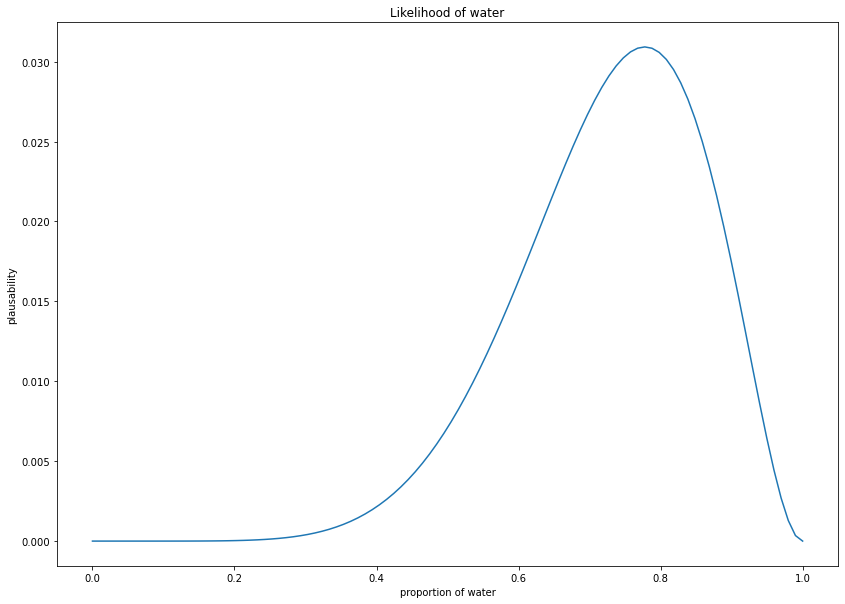

In [4]:
#n, p = 10, 0.5
#x = np.arange(stats.binom.ppf(0.01, n, p), 
#              stats.binom.ppf(1, n, p))

fig, ax = plt.subplots(1, 1, figsize=(14,10))
#ax.plot(x, stats.binom.pmf(x, n, p), label='binom pmf')
ax.plot(grid, posterior,'-', label='binom pmf')
plt.title('Likelihood of water')
plt.xlabel('proportion of water')
plt.ylabel('plausability');
#ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);

In [109]:
def plot_likelihood(k, n, points):
    plt.rcParams["figure.figsize"] = (30,10)

    if type(points) is list:
        m = len(points)
    else:
        m = 1
    
    fig, axs = plt.subplots(1, m, sharey=False, sharex=False)
        
    if type(points) is list:
        if len(points) == 1:
            grid, posterior = grid_approximation(k, n, points[0])
            axs.plot(grid, posterior,'-', label='binom pmf');
        else:
            j=0
            plt.title('sssssssssssssssssss')
            for i in points:    
                grid, posterior = grid_approximation(k, n, i)
                axs[j].plot(grid, posterior,'-', label='binom pmf')
                axs[j].set_title(str(i)+' estimation points')
                if j == 0:
                    axs[j].set_xlabel('Proportion of water')
                    axs[j].set_ylabel('Plausability')
                j+=1
            ;
    else:
        if points < 3:
            points = 50
            print('Setting default #points of approximation to 50')
        grid, posterior = grid_approximation(k, n, points)
        axs.plot(grid, posterior,'-', label='binom pmf');


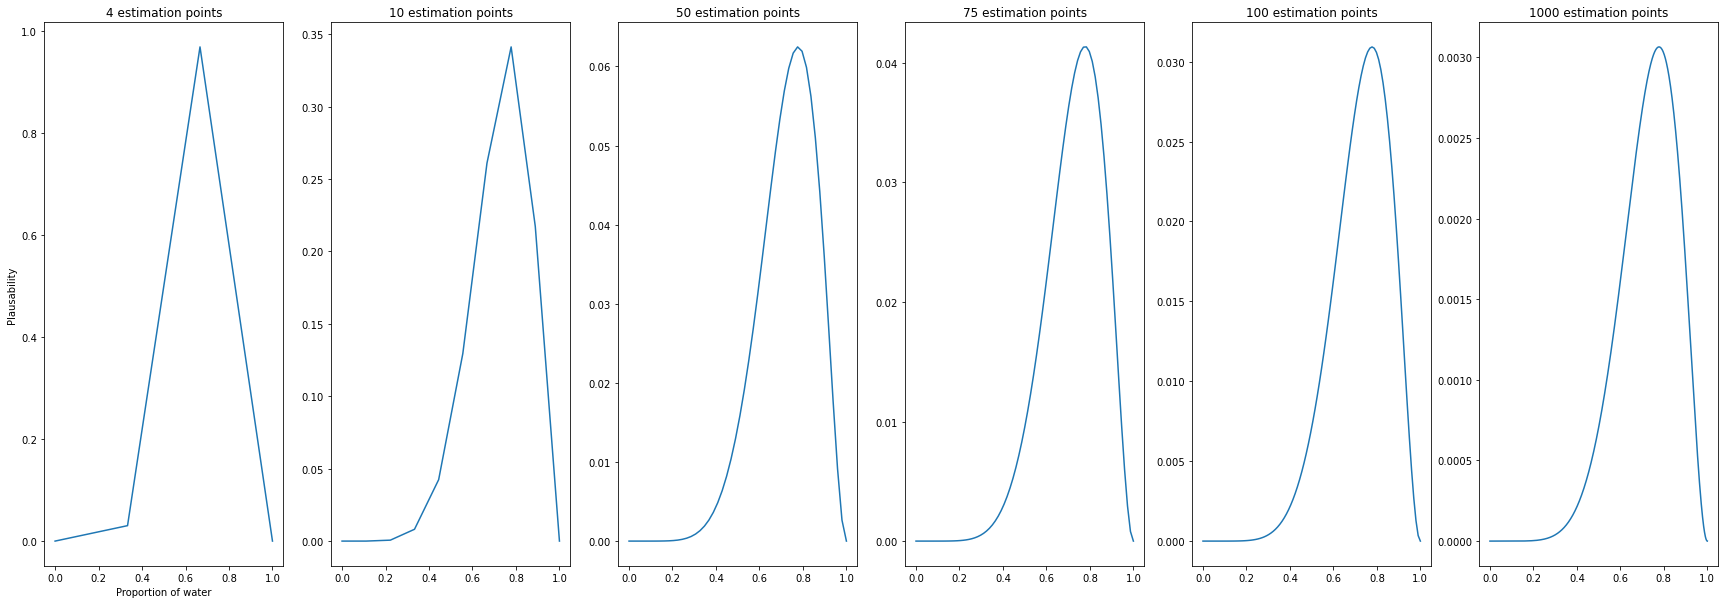

In [110]:
point_lst = [4,10,50,75,100,1000]
k, n = 7, 9

plot_likelihood(k, n, point_lst)

> After a certain amount of points the difference between approximation is minimal.